# Task 3

Author: Roshni Sanjay Jadhav\
Company: Prodigy InfoTech

Problem Statement: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing and reading the data`

In [2]:
df = pd.read_csv('bank-full.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


EDA

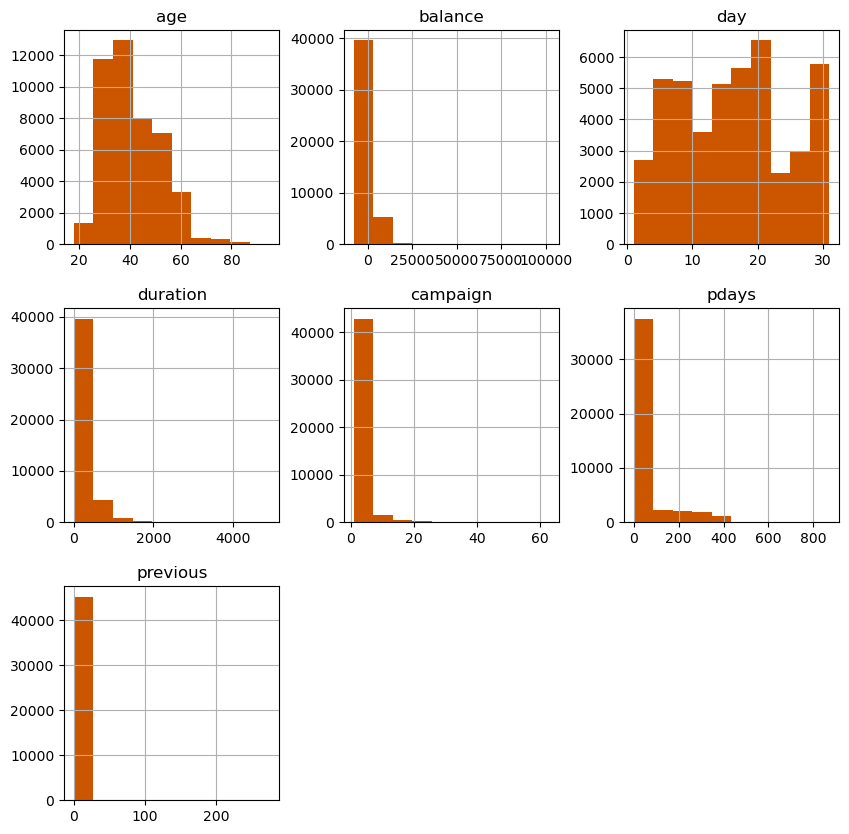

In [14]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

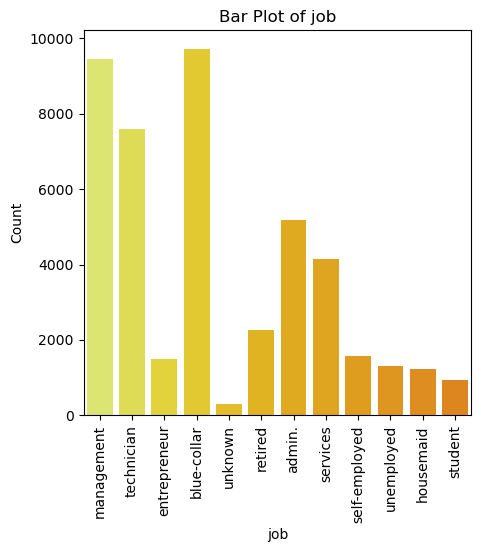

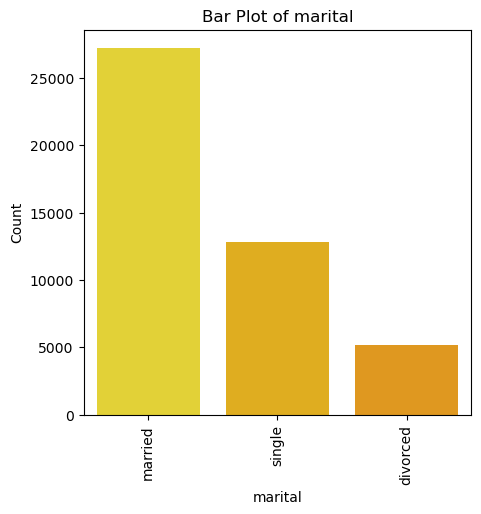

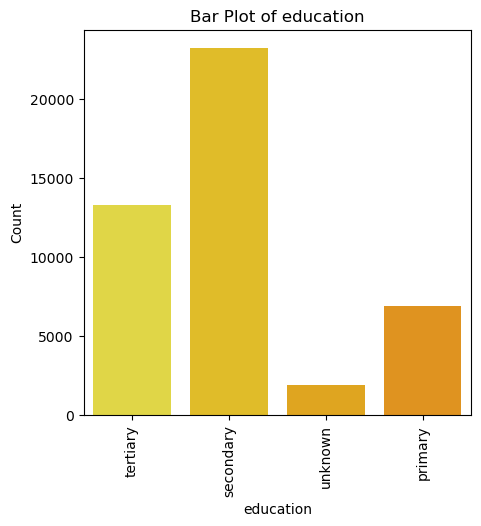

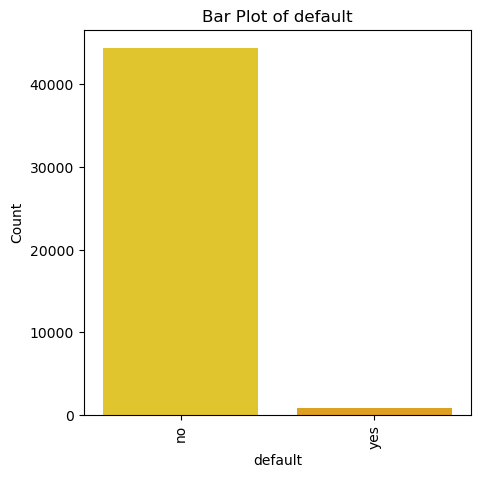

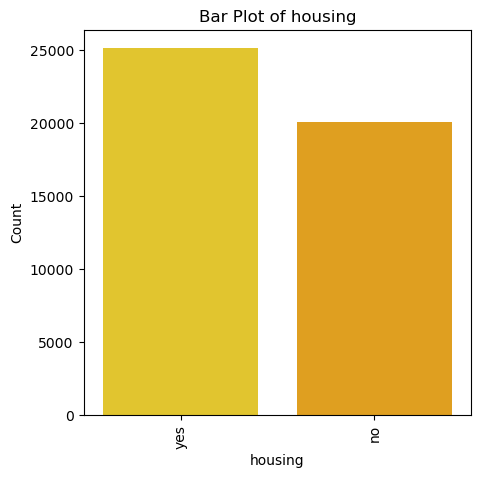

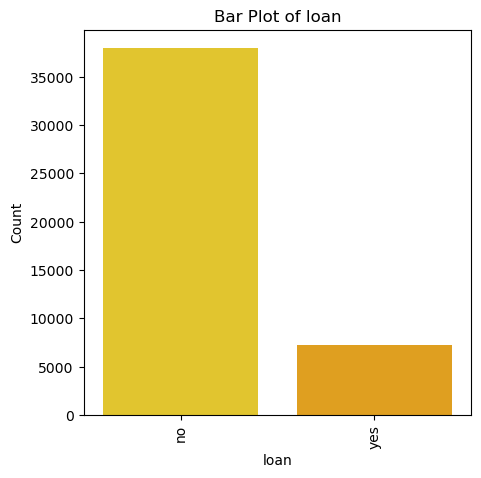

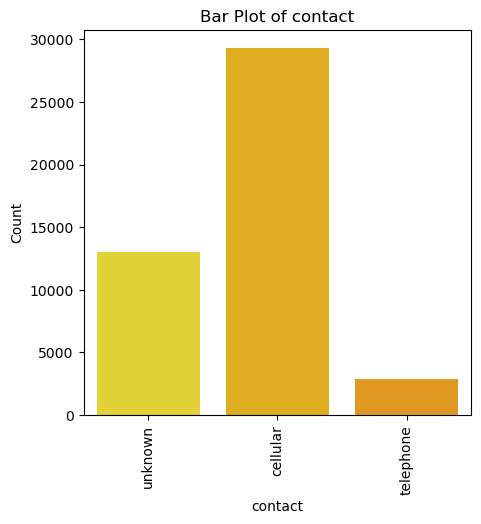

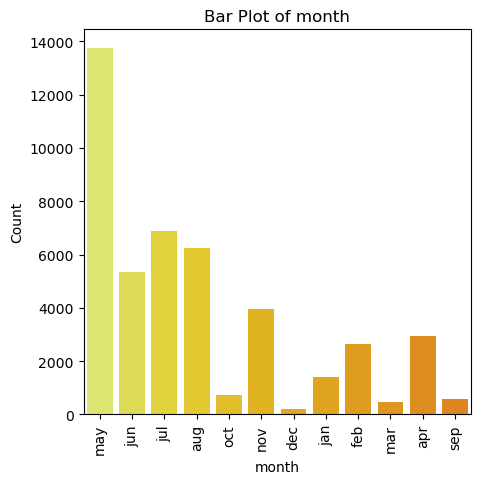

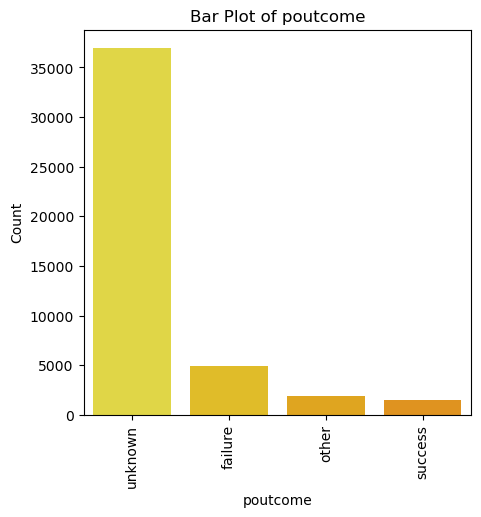

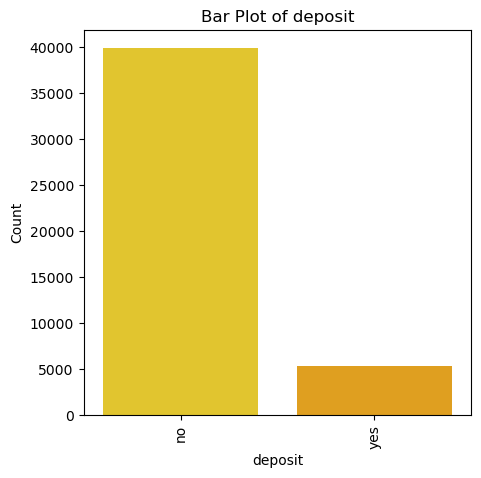

In [15]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

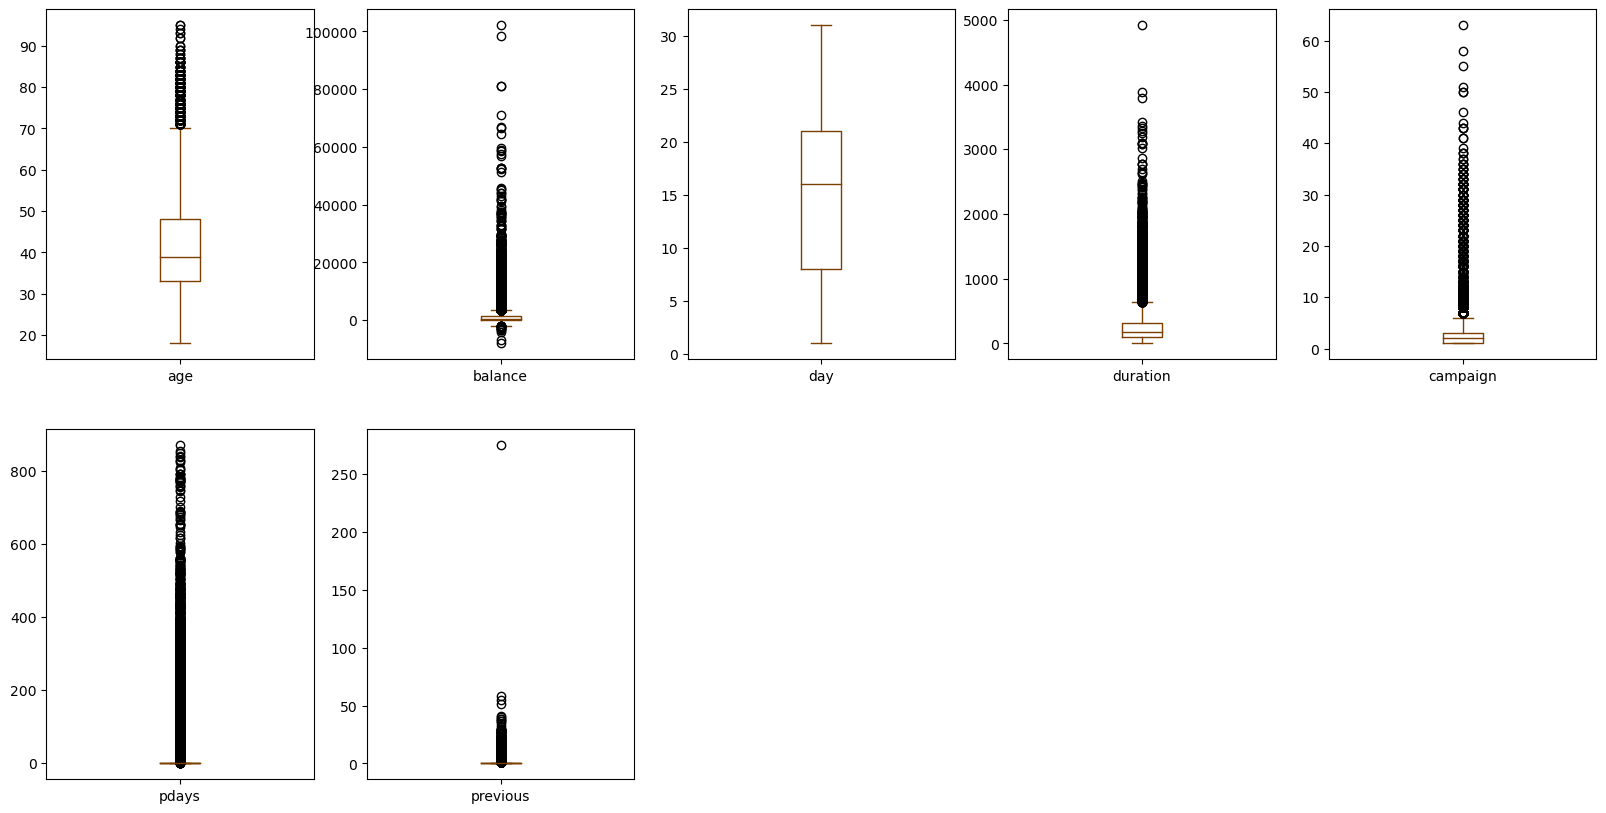

In [16]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [17]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

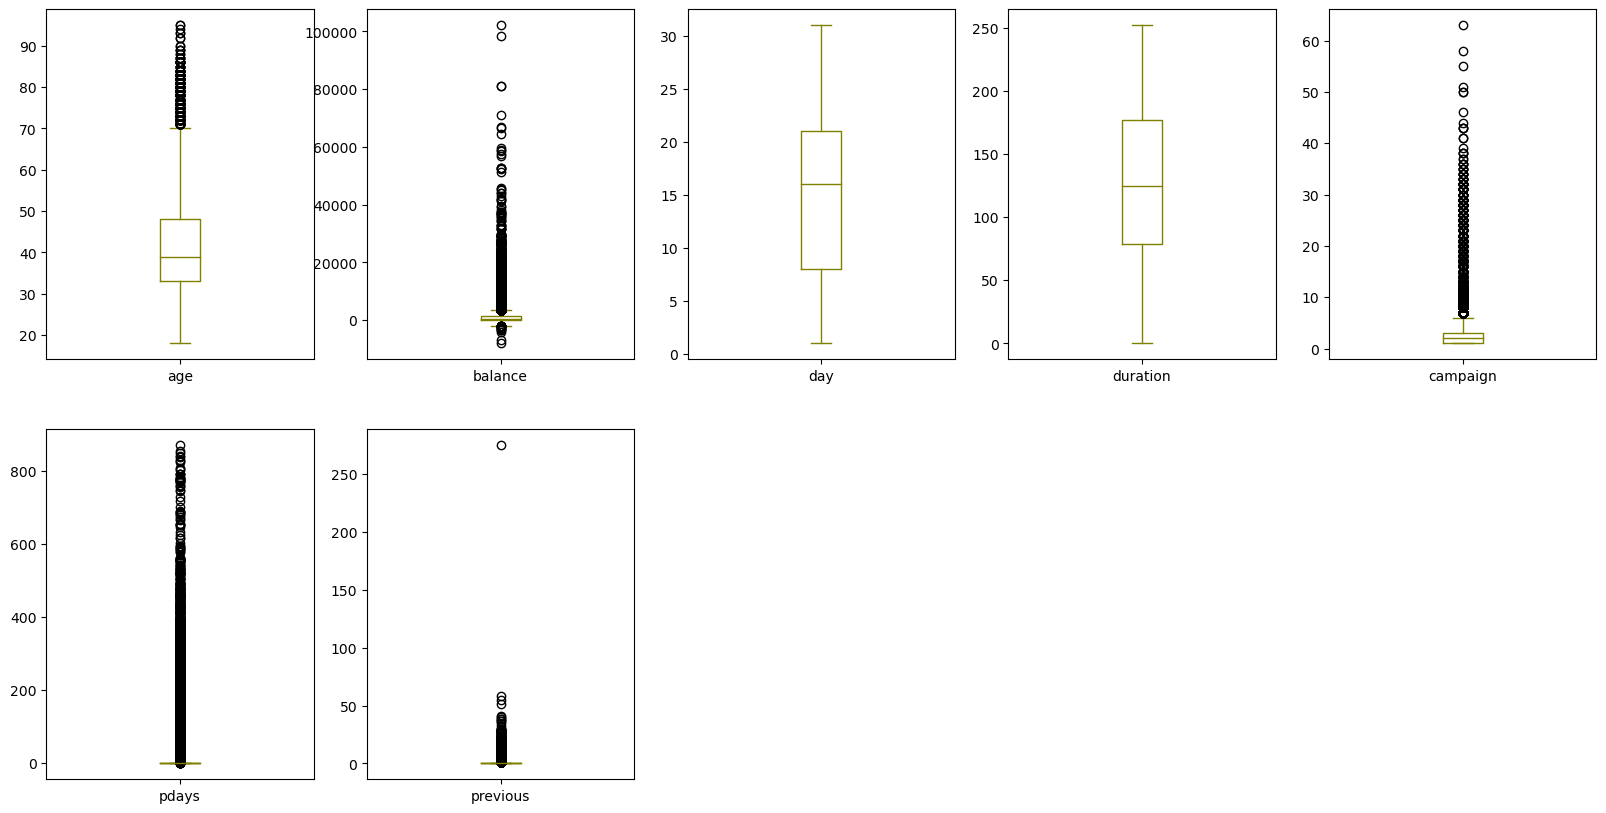

In [18]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.007718  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.007930 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.073588  0.162490 -0.093044 -0.051710
duration -0.007718  0.007930 -0.073588  1.000000 -0.215021  0.017803  0.003690
campaign  0.004760 -0.014578  0.162490 -0.215021  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044  0.017803 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.003690 -0.032855  0.454820  1.000000


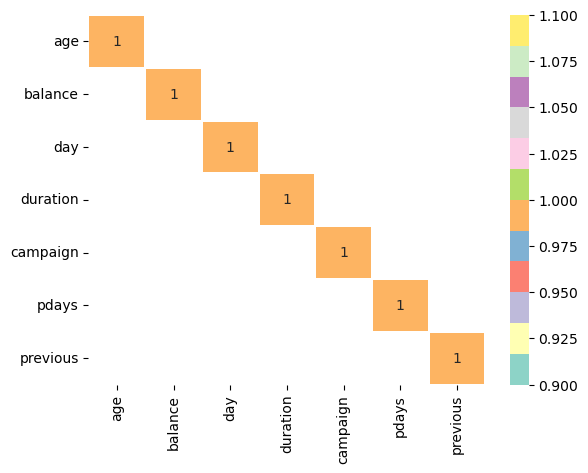

In [19]:
corr = df.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [20]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [21]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [22]:
columns_to_drop = [col for col in high_corr_cols if col in df1.columns]
print("Columns to drop:", columns_to_drop)

df1.drop(columns=columns_to_drop, inplace=True, axis=1)
columns_to_drop = [col for col in high_corr_cols if col in df1.columns]
print("Columns to drop:", columns_to_drop)

df1.drop(columns=columns_to_drop, inplace=True, axis=1)
df1.columns

Columns to drop: []
Columns to drop: []


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [23]:
df1.shape

(45211, 17)

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,253,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,253,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,253,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,253,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,253,3,0,0,3,0


In [25]:
df_encoded['deposit'].value_counts()

0    39922
1     5289
Name: deposit, dtype: int64

Model Building

In [26]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(45211, 16)
(45211,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
from sklearn.model_selection import train_test_split

print(4119*0.25)

1029.75


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 16)
(11303, 16)
(33908,)
(11303,)


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [31]:
mscore(dt)

Training Score 0.8914120561519405
Testing Score 0.8882597540475979


In [32]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [33]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8882597540475979
Confusion Matrix
 [[9860  138]
 [1125  180]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9998
           1       0.57      0.14      0.22      1305

    accuracy                           0.89     11303
   macro avg       0.73      0.56      0.58     11303
weighted avg       0.86      0.89      0.86     11303



In [34]:
from sklearn.tree import plot_tree

In [35]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


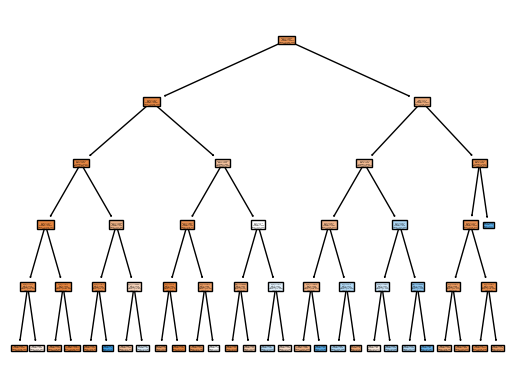

In [36]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [37]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [38]:
mscore(dt1)

Training Score 0.8882859502182375
Testing Score 0.8885251703087675


In [39]:
ypred_dt1 = dt1.predict(x_test)

In [40]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8885251703087675
Confusion Matrix
 [[9906   92]
 [1168  137]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9998
           1       0.60      0.10      0.18      1305

    accuracy                           0.89     11303
   macro avg       0.75      0.55      0.56     11303
weighted avg       0.86      0.89      0.85     11303



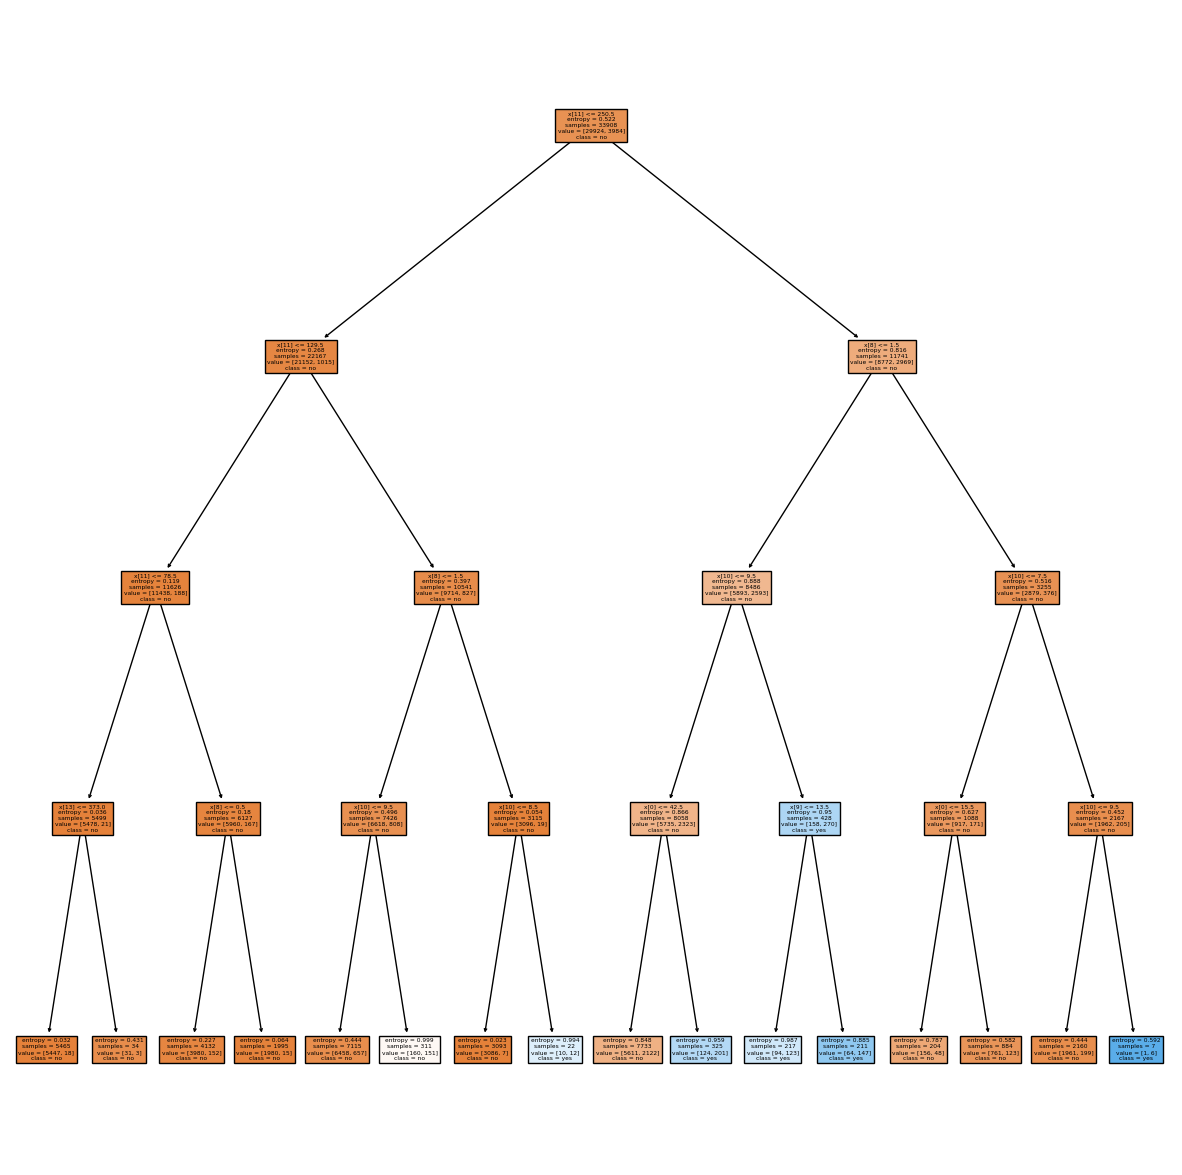

In [41]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()